In [1]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [18]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [33]:
WASTE_GENERATION_df = pd.read_csv("C:/Users/hp/Desktop/Projects/Business-Sustainability-through-Environmental-Impact-Analysis/Data/Waste Generation/municipal waste.csv")
WASTE_GENERATION_df.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [34]:
null_df = WASTE_GENERATION_df.isnull().mean()*100
null_df

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
wden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
gdp            8.891960
proads        10.205022
wage           6.565308
finance        8.891960
dtype: float64

In [36]:
for col,nulls in zip(null_df.index,null_df.values):
    
    if nulls<5:
        WASTE_GENERATION_df.dropna(subset=[col],inplace=True)

In [37]:
null_df = WASTE_GENERATION_df.isnull().mean()*100
null_df

region         0.000000
province       0.000000
name           0.000000
tc             0.000000
cres           0.000000
csor           0.000000
istat          0.000000
area           0.000000
pop            0.000000
alt            0.000000
isle           0.000000
sea            0.000000
pden           0.000000
wden           0.000000
urb            0.000000
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.251863
paper          0.000000
glass          0.000000
wood          23.050174
metal          4.197715
plastic        0.000000
raee           5.861898
texile        21.882762
other          0.000000
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            5.886736
roads          9.488326
s_wteregio     5.886736
s_landfill     5.886736
gdp            8.196721
proads         9.488326
wage           5.886736
finance        8.196721
dtype: float64

In [38]:
print(WASTE_GENERATION_df['organic'].isnull().sum())
print(WASTE_GENERATION_df['organic'].isnull().mean()*100)

453
11.251862891207153


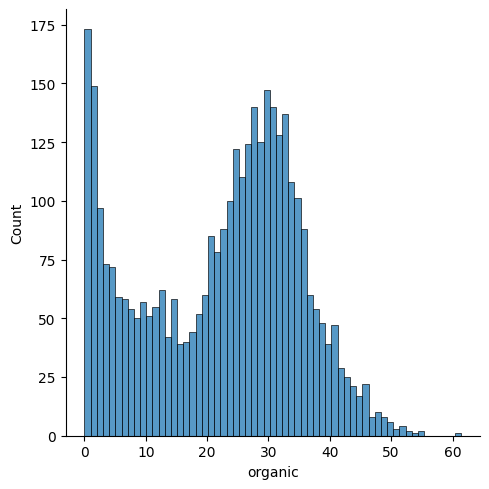

In [46]:
import seaborn as sns

sns.displot(WASTE_GENERATION_df['organic'],binwidth=1)